# **Machine Problem 2: Predicting House Prices with Multiple Regression**


### Name: Vanesse V. Reyes
### Section: BSCS - 3B
### Course: CSST 102 | Basic Machine Learning


Dataset Overview:
   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05

Missing Data:
Series([], dtype: int64)

Summary Statistics:
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528 

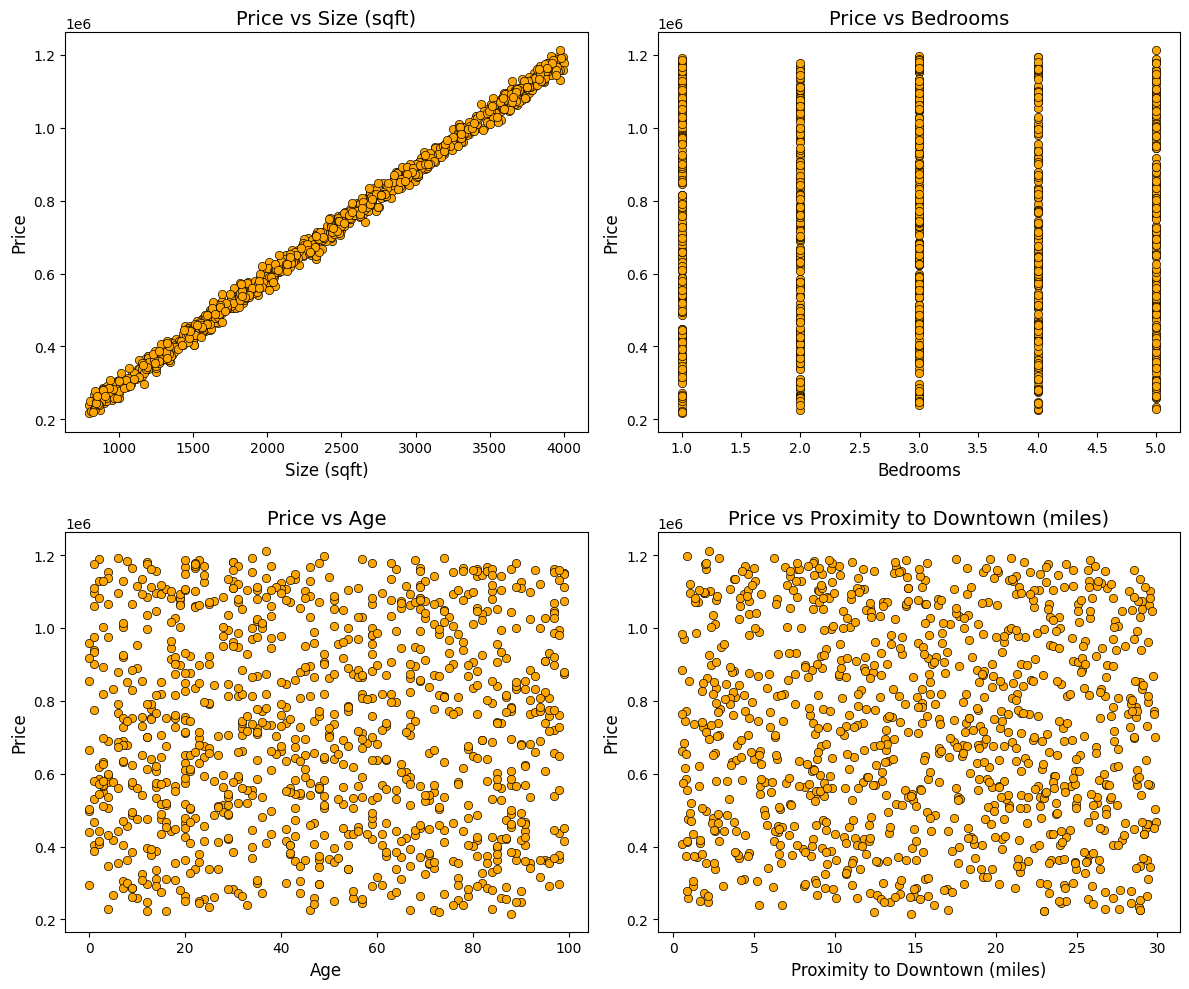

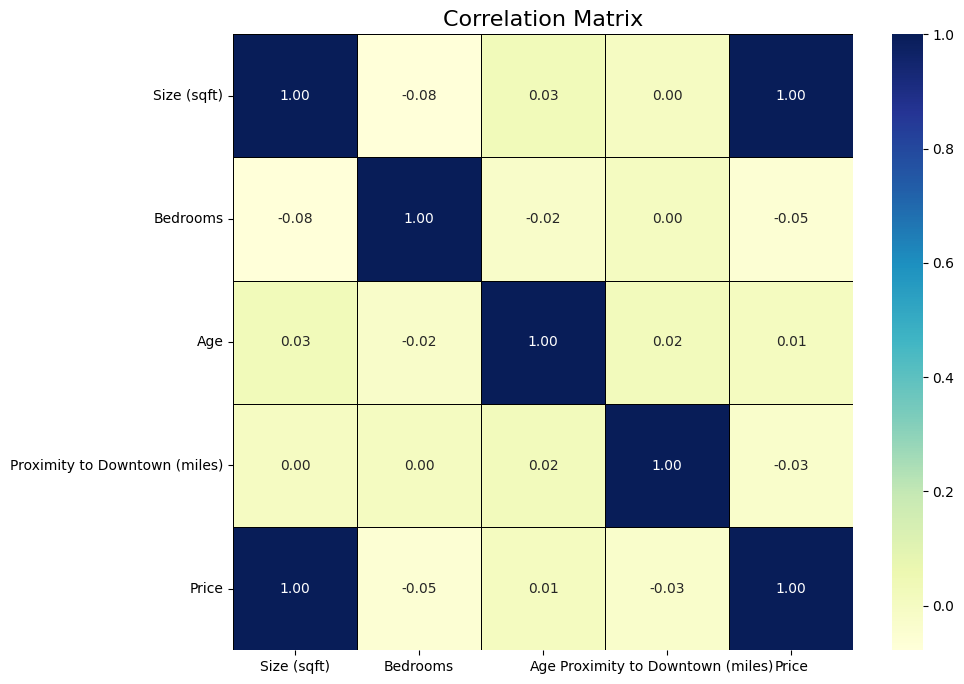

In [13]:
#@title # **1. Data Exploration and Visualization**
#@markdown # **Overview:**
#@markdown This script performs data exploration and visualization on a housing dataset. It includes checking for missing values, generating summary statistics, creating scatter plots, and displaying a correlation matrix.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'datasets_house_prices.csv'  # Replace with actual file path
house_data = pd.read_csv(file_path)

# Function to display dataset overview
def display_overview(data):
    print("Dataset Overview:")
    print(data.head())

# Function to check for missing data
def check_missing_data(data):
    missing_data = data.isnull().sum()
    print("\nMissing Data:")
    print(missing_data[missing_data > 0])

# Function to fill missing values and remove outliers
def clean_data(data):
    # Fill missing values with the mean
    data.fillna(data.mean(), inplace=True)

    # Remove outliers using the IQR method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    filtered_data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return filtered_data

# Function to display summary statistics
def display_summary_statistics(data):
    print("\nSummary Statistics:")
    summary_stats = data.describe()
    print(summary_stats)

# Function to create scatter plots with custom colors
def create_scatter_plots(data):
    features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
    plt.figure(figsize=(12, 10))

    for i, feature in enumerate(features, start=1):
        plt.subplot(2, 2, i)
        sns.scatterplot(x=data[feature], y=data['Price'], color='orange', edgecolor='black')
        plt.title(f'Price vs {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Price', fontsize=12)

    plt.tight_layout()
    plt.show()

# Function to display the correlation matrix with custom colors
def display_correlation_matrix(data):
    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, linecolor='black')
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

# Execute functions
display_overview(house_data)
check_missing_data(house_data)
cleaned_data = clean_data(house_data)
display_summary_statistics(cleaned_data)
create_scatter_plots(cleaned_data)
display_correlation_matrix(cleaned_data)

In [14]:
#@title # **2. Data Preprocessing**
#@markdown # **Overview:**
#@markdown This section focuses on preprocessing the dataset for modeling. It includes handling missing data, separating features from the target variable, splitting the dataset into training and testing sets, and standardizing the feature values.

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to preprocess the data
def preprocess_data(data):
    # Step 1: Verify and handle missing data
    if data.isnull().sum().sum() == 0:
        print("No missing data found. Proceeding with preprocessing.")
    else:
        print("Missing data detected. Please handle it before proceeding.")
        return None, None, None, None

    # Step 2: Separate features (X) and target variable (y)
    features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
    X = data[features]
    y = data['Price']

    # Step 3: Split the dataset into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 4: Standardize the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
    X_test_scaled = scaler.transform(X_test)        # Only transform the test data

    return X_train_scaled, X_test_scaled, y_train, y_test

# Execute preprocessing
X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(house_data)

# Optional: Display the first 5 rows of the standardized training data
if X_train_scaled is not None:
    print("\nFirst 5 rows of the standardized training data:")
    print(pd.DataFrame(X_train_scaled, columns=['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']).head())

No missing data found. Proceeding with preprocessing.

First 5 rows of the standardized training data:
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)
0     1.677660 -1.456677  1.737153                       0.045620
1     1.254519  1.403559 -0.577340                      -1.037343
2    -0.817483 -0.741618 -1.130055                      -1.465520
3    -1.143632 -0.026559  0.113553                      -0.051020
4     0.467926 -1.456677  0.389911                       1.465485


In [15]:
#@title # **3. Model Development**
#@markdown # **Overview:**
#@markdown This section focuses on developing a multiple linear regression model to predict house prices. It includes building the model, training it on the training data, and optionally performing feature selection using statistical analysis. The model coefficients and intercept are also extracted.

# Import necessary libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Function to develop the regression model
def develop_model(X_train, y_train, X_test):
    # Step 1: Build the regression model
    model = LinearRegression()

    # Step 2: Train the model using the training data
    model.fit(X_train, y_train)

    # Step 3: Predict on the test set
    y_pred = model.predict(X_test)

    return model, y_pred

# Function to perform feature selection (optional)
def perform_feature_selection(X_train, y_train):
    # Add a constant to the features for the intercept
    X_train_const = sm.add_constant(X_train)

    # Fit the OLS regression model
    ols_model = sm.OLS(y_train, X_train_const).fit()

    # Print the summary of the OLS regression
    print(ols_model.summary())

    return ols_model

# Execute model development
model, y_pred = develop_model(X_train_scaled, y_train, X_test_scaled)

# Perform feature selection (optional)
ols_model = perform_feature_selection(X_train_scaled, y_train)

# Output the model coefficients and intercept
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.332e+05
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:38:56   Log-Likelihood:                -7452.2
No. Observations:                 700   AIC:                         1.491e+04
Df Residuals:                     695   BIC:                         1.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.092e+05    385.696   1838.693      0.0

Mean Squared Error (MSE): 100214724.63
R-squared: 1.00
Adjusted R-squared: 1.00


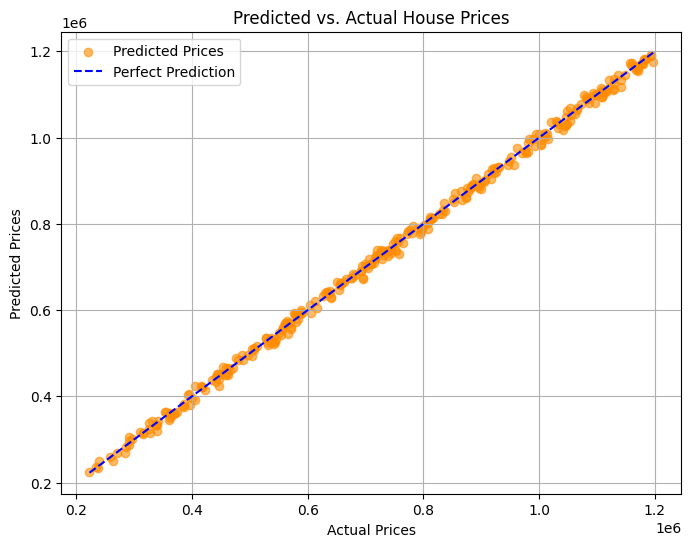

In [16]:
#@title # **4. Model Evaluation**
#@markdown # **Overview:**
#@markdown This section evaluates the performance of the regression model using various metrics, including Mean Squared Error (MSE), R-squared, and Adjusted R-squared. Additionally, it visualizes the relationship between actual and predicted house prices.

# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to evaluate the model
def evaluate_model(y_true, y_pred, X_test):
    # Step 1: Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.2f}")

    # Step 2: Calculate R-squared and Adjusted R-squared
    r_squared = r2_score(y_true, y_pred)
    n = X_test.shape[0]  # Number of data points
    p = X_test.shape[1]  # Number of predictors
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

    print(f"R-squared: {r_squared:.2f}")
    print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

    # Step 3: Plot Predicted vs. Actual Prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color='darkorange', label='Predicted Prices')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='blue', linestyle='--', label='Perfect Prediction')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Predicted vs. Actual House Prices")
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute model evaluation
evaluate_model(y_test, y_pred, X_test_scaled)